In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

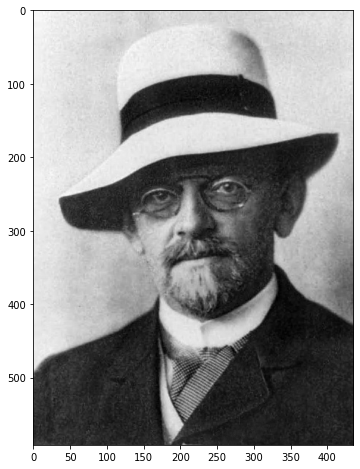

In [150]:
im = cv2.imread('sample_picture_02.jpg')

fig, ax = plt.subplots(figsize=(12,8))
plt.imshow(im[:, :, [2,1,0]])

In [151]:
(h, w) = im.shape[:2]
(cX, cY) = (w//2, h//2)

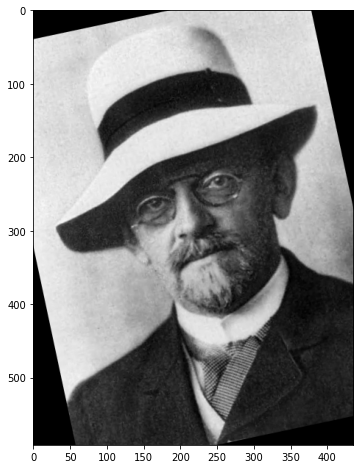

In [49]:
theta = np.pi*12/180

M = cv2.getRotationMatrix2D((cX, cY), 180*theta/np.pi, 1)
im_rotated = cv2.warpAffine(im, M, (w, h))

fig, ax = plt.subplots(figsize=(12,8))
plt.imshow(im_rotated)

In [119]:
a, ap

(array([[-218],
        [ 296]]),
 array([[-274.77803744],
        [ 244.20694122]]))

In [120]:
b, bp

(array([[-218],
        [-296]]),
 array([[-151.69431648],
        [-334.85643842]]))

In [50]:
a = np.array([[-cX, cY]]).T
b = np.array([[-cX, -cY]]).T
c = np.array([[cX, -cY]]).T
d = np.array([[cX, cY]]).T

rotation_matrix = np.array(
    [
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ]
)

ap = np.dot(rotation_matrix, a)
bp = np.dot(rotation_matrix, b)
cp = np.dot(rotation_matrix, c)
dp = np.dot(rotation_matrix, d)

In [145]:
(bp + np.dot((P-bp)[:, 0], vec_director)*vec_director) + np.array([[cX, cY]]).T

array([[55.5373011 ],
       [11.80481777]])

In [70]:
P = b
vec_director = (ap - bp)/np.linalg.norm(ap - bp)
vector_to_point = P - (bp + np.dot((P-bp)[:, 0], vec_director)*vec_director)

In [95]:
vector_to_point

array([[-55.5373011 ],
       [-11.80481777]])

In [72]:
def cal_shortest_vec(P, point_line, vec_director):
    vec_director = vec_director/np.linalg.norm(vec_director)
    vector_to_point = P - (point_line + np.dot((P-point_line)[:, 0], vec_director)*vec_director)
    return vector_to_point
    
    
def cal_best_scale_up(im_shape, increase_w, increase_h):
    w, h = im_shape
    scale_w = (w + increase_w)/w
    scale_h = (h + increase_h)/h
    return max([scale_w, scale_h])

In [169]:
vector_to_point = cal_shortest_vec(a, ap, dp - ap)
max_scale_a = cal_best_scale_up((w, h), abs(2*vector_to_point[0, 0]), abs(2*vector_to_point[1, 0]))

vector_to_point = cal_shortest_vec(b, bp, ap - bp)
max_scale_b = cal_best_scale_up((w, h), abs(2*vector_to_point[0, 0]), abs(2*vector_to_point[1, 0]))

max_scale = max([max_scale_a, max_scale_b])

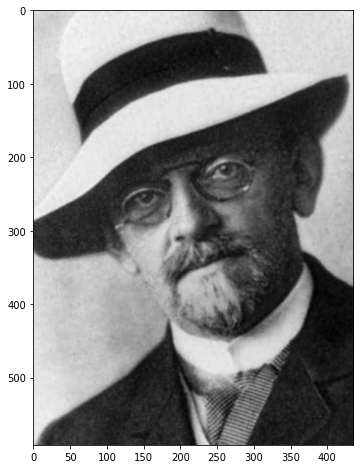

In [170]:
theta = np.pi*12/180

M = cv2.getRotationMatrix2D((cX, cY), 180*theta/np.pi, 1)
im_rotated = cv2.warpAffine(im, M, (w, h))

im_scaled = cv2.resize(im_rotated, (math.ceil(w*max_scale), math.ceil(h*max_scale)))
h_rotated, w_rotated = im_scaled.shape[:2]
w_extra, h_extra = w_rotated-w, h_rotated-h

fig, ax = plt.subplots(figsize=(12,8))
plt.imshow(im_scaled[h_extra//2:-h_extra//2, w_extra//2:-w_extra//2, :])